   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


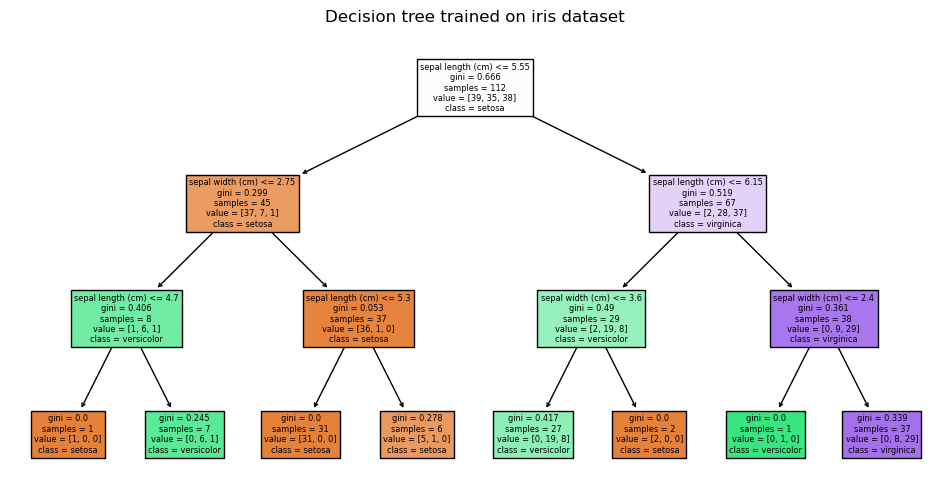

NameError: name 'palette' is not defined

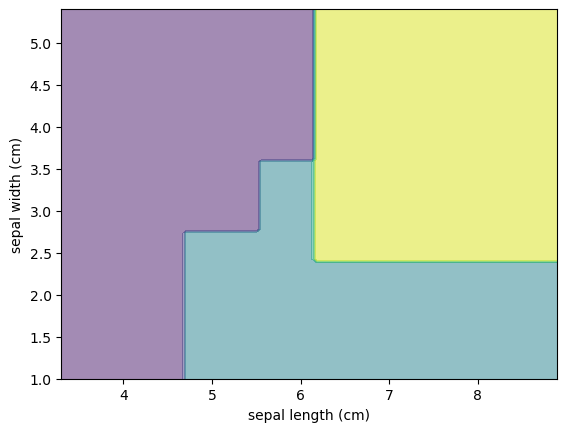

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

iris = load_iris(as_frame=True)

culmen_columns = iris.frame.columns[:2]
target_column = "target"
iris_df = iris.frame
culmen_columns = iris_df.columns[:2]
print(iris_df.head())
""" print(culmen_columns)
print(iris.target)
print(iris.target_names)
print(iris.feature_names) """

X, y = iris_df[culmen_columns], iris_df[target_column]
#X = iris.data[:, :2]

# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.25)

dt_classifier = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt_classifier.fit(X_train,y_train)

# Plotting the Decision Tree
plt.figure(figsize=(12,6))
plot_tree(dt_classifier, filled=True, feature_names=culmen_columns, class_names=iris.target_names)
plt.title("Decision tree trained on iris dataset")
plt.show()

disp = DecisionBoundaryDisplay.from_estimator(
    dt_classifier, X, response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
)

ax = sns.scatterplot(
    data=iris,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)

#disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

# Plot data points
for i, c in zip(range(3), ['r', 'g', 'b']):
    indices = np.where(iris.target == i)
    plt.scatter(X[indices, 0], X[indices, 1], c=c, label=iris.target_names[i], edgecolors='k')

plt.legend(loc='best')
plt.title(f"Decision surface for tree trained on {iris.feature_names[0]} and {iris.feature_names[1]}")
plt.show()


